In [1]:
import numpy as np
from numpy.core.numeric import True_
import get_cup_dataset as dt
from SVR import SVR
import time
import matplotlib.pyplot as plt
import sys
import math
import time
import sklearn.svm as ss
from sklearn.metrics import r2_score

In [2]:
def plot_svr_predict(svr, x, y, pred, text="fig_title"):
    fig,axs = plt.subplots(2,5, figsize=(15,15))
    for i in range(x.shape[1]):
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],y,color="red",marker='x')
        axs[i//(x.shape[1]//2)][i%(x.shape[1]//2)].scatter(x[:,i],pred,color="blue",marker='.')
    fig.suptitle(text)
    plt.show()

In [3]:
data, data_out = dt._get_cup('train')
test_split = 0.2
test_len = int(len(data)*test_split)
test, test_out = data[:test_len, :], data_out[:test_len, :]
test_out1, test_out2 = test_out[:, 0], test_out[:, 1]
dev_set, dev_out = data[test_len:, :], data_out[test_len:, :]
dev_out1, dev_out2 = dev_out[:, 0], dev_out[:, 1]

max_iter = -1 # as much as needed..

# LINEAR

In [4]:
start = time.time()
regressor = ss.SVR(kernel = 'linear', max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.06905031204223633


0.9114966920893935

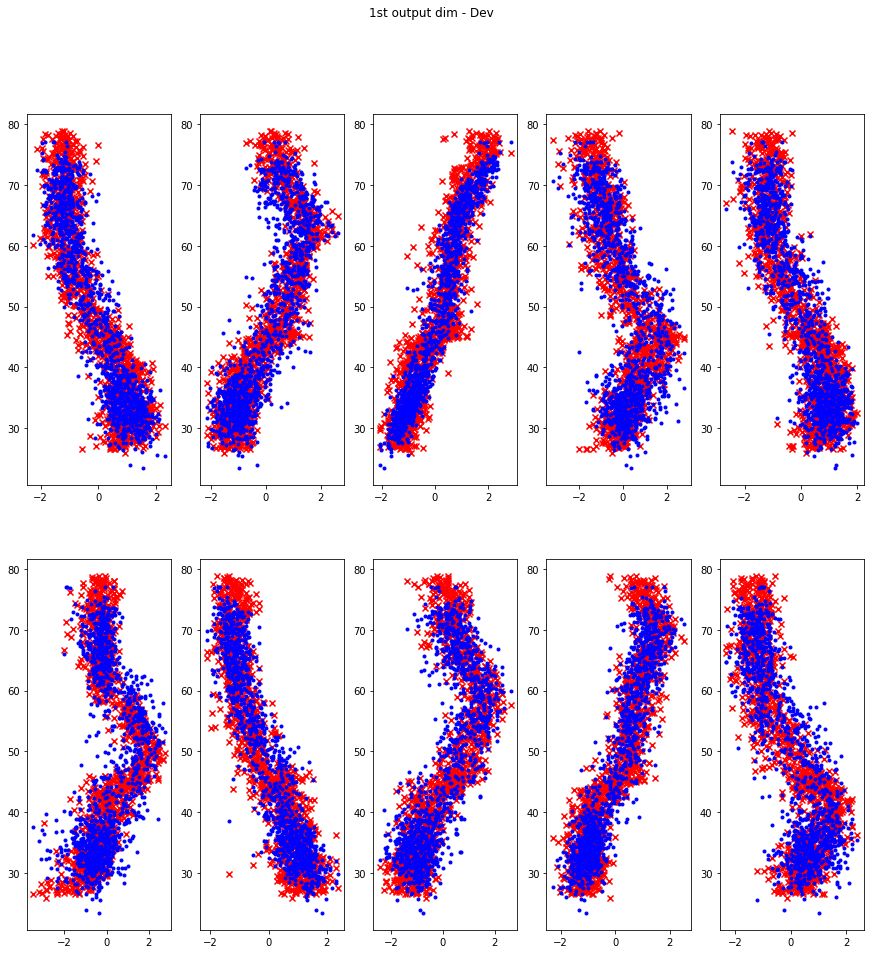

In [5]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [6]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# RBF

In [7]:
start = time.time()
regressor = ss.SVR(kernel = 'rbf', gamma='scale', max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.07001042366027832


0.9704972626123143

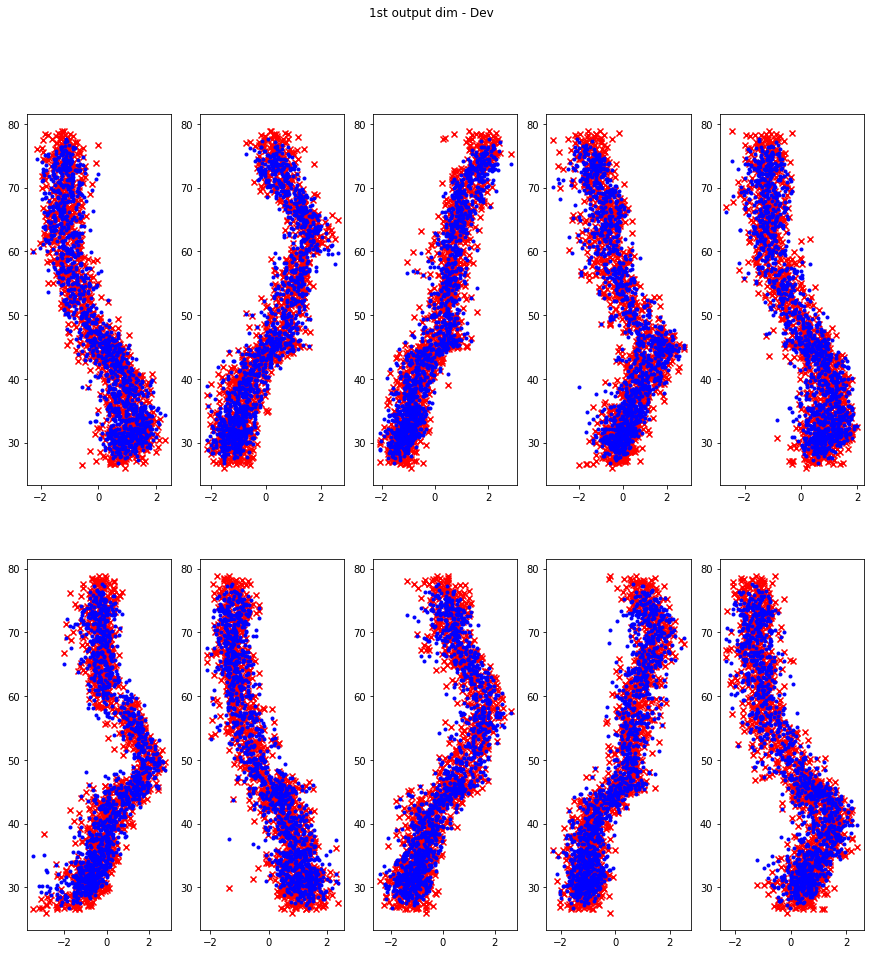

In [8]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [9]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# POLY

In [10]:
start = time.time()
regressor = ss.SVR(kernel = 'poly', gamma=0.075, max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.05299663543701172


0.8643998312139158

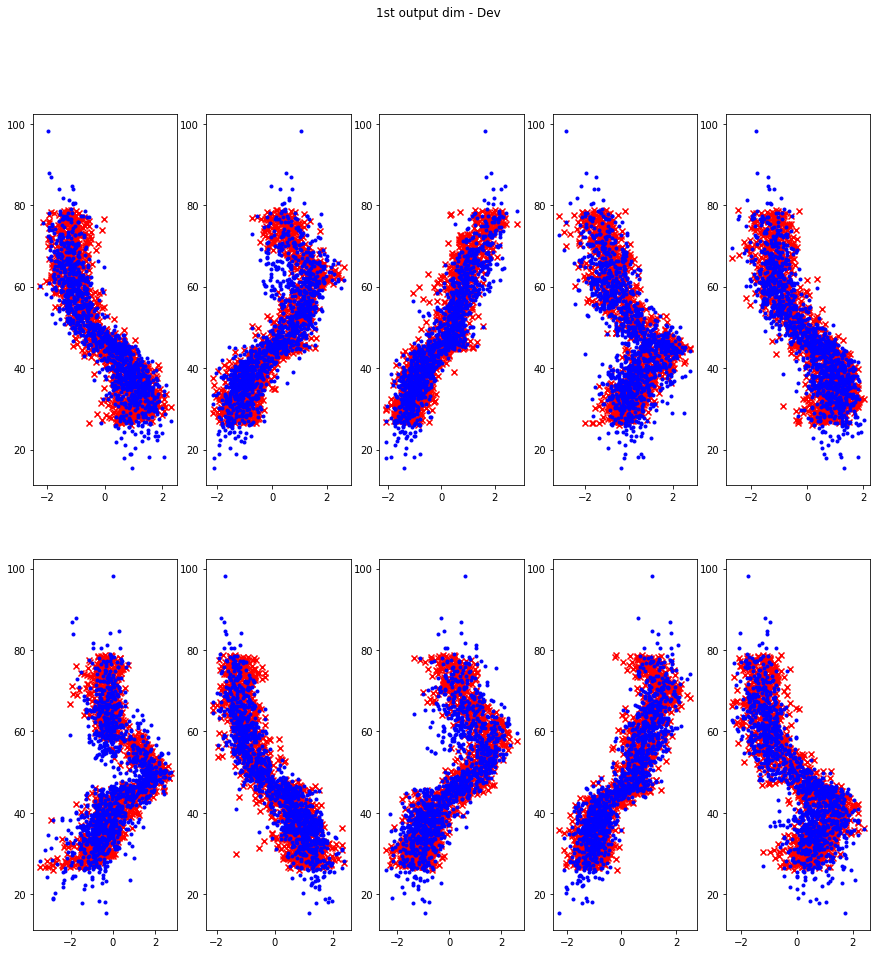

In [11]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [12]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.075,
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# SIGMOID

In [13]:
start = time.time()
regressor = ss.SVR(kernel = 'sigmoid', gamma=0.05, max_iter=max_iter)
regressor.fit(dev_set, dev_out1)
print(f"elapsed time {time.time() - start}")
y_pred = regressor.predict(test)
r2_score(test_out1, y_pred)

elapsed time 0.0670616626739502


0.9011465336940763

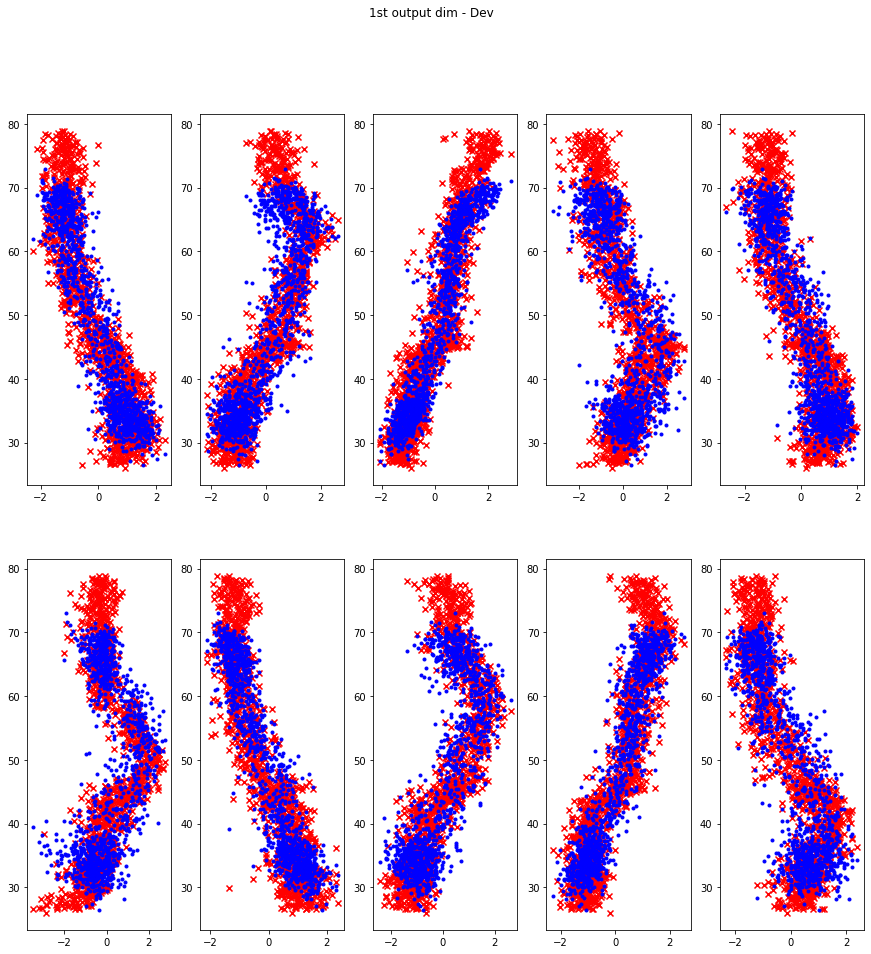

In [14]:
plot_svr_predict(None, dev_set, dev_out1, regressor.predict(dev_set), text='1st output dim - Dev')

In [15]:
regressor.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 0.05,
 'kernel': 'sigmoid',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}